In [1]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk import pos_tag

lmtzr = WordNetLemmatizer()

# Exercise 1 of Taming Text Homework

- We first read the data at our disposal and replace the missing values by a simple space

In [2]:
data=pd.read_csv("Emails.csv")
data.fillna(' ',inplace=True)

- As you can see below, we have a lot of columns.
- for this question we decided to only take 'ExtractedBodyText' and 'ExtractedSubject'
- Indeed, we will be analyzing both the body and the subject of each extracted emails.

In [3]:
data.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [4]:
data.head(3)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,,"Sullivan, Jacob J <Sullivan11@state.gov>",,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,,,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,,,,,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


## RAW DATA

In [5]:
raw=' '.join(data['ExtractedSubject'] + ' ' + data['ExtractedBodyText'])

- Then, we generate a word cloud representing the most frequent words present in the body and subject of hillary emails
- We notice that there are a lot of stop words which are not significant for our analysis that are present in the cloud (The, on, in , you , ...)
- one can also see the words : 'Re', 'Fw', 'FYI' which are related to the mails (in the subject part of the email)

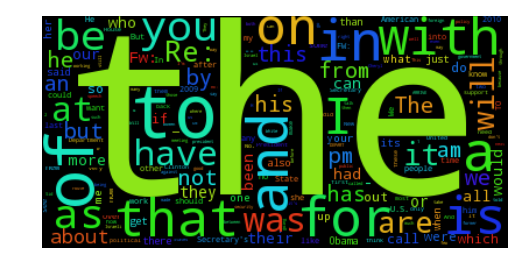

In [6]:
wordcloud = WordCloud().generate_from_frequencies(Counter(raw.split(" ")).most_common())
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## CLEANING

- In this part, we will clean our data and get rid of most of the noise

- The function below removes stop words from nltk package and email related words like 're' ...

In [7]:
def removeStopWords(String):
    stopwordlist = set(stopwords.words("english"))
    toRemove = ['fm','am',"n't", 'sent', 'fw', 'pm', 'fwd', 're','cc', 'attachments','fyi']
    stopwordlist.update(toRemove)  
    liste=[word for word in String if word not in stopwordlist]
    return liste

- We also remove all non character token

In [8]:
def removeChar(string):
    return re.sub("[^a-zA-Z]+", "\t", string)

- We lower case all tokens

In [9]:
def lowerCase(string):
    return string.lower()

- here we lemmatize all the cleaned tokens after pos tagging them :
- for instance lemmatize(["loves",'loving','loved'])=['love', 'love', 'love']

In [15]:
def lemmatize(words):
    app=[]
    for word in words:
        if pos_tag([word])[0][1][0].lower()=='v':
            app.append(lmtzr.lemmatize(word,pos='v'))
        else:
            app.append(lmtzr.lemmatize(word))
    return app

- Below, we clean the raw data and we call all the cleaning functions.

In [16]:
cleaned_raw=raw
cleaned_raw=lowerCase(cleaned_raw)
cleaned_raw=nltk.word_tokenize(cleaned_raw)
cleaned_raw=removeStopWords(cleaned_raw)
cleaned_raw=' '.join(cleaned_raw)
cleaned_raw=removeChar(cleaned_raw)
words=cleaned_raw.split()
words=lemmatize(words)
#Taking words which have more than one character
words=[word for word in words if len(word)>1]
cleanText= " ".join(words)

- Then, we generate a word cloud of the cleaned dataset
- We notice that the noisy tokens have been removed
- Words like 'state', 'obama', 'office' are very important (by their frequency) compared to the raw cloud

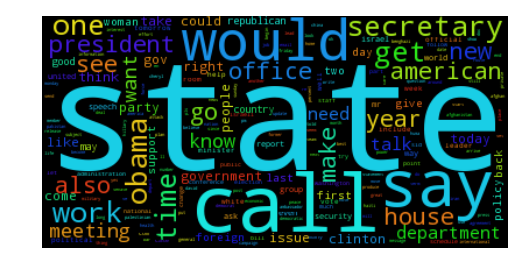

In [17]:
wordcloud = WordCloud().generate_from_frequencies(Counter(cleanText.split(" ")).most_common())
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()